<a href="https://colab.research.google.com/github/UlasSen/DeepLearning/blob/main/PyTorch/PyTorchMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [ ]:
transform= transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))])
# Eğitim ve test veri setlerini yükle
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [ ]:
images, labels = next(iter(trainloader))
print(f"Batch boyutu: {images.shape}")

Batch boyutu: torch.Size([64, 1, 28, 28])


In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # 10 sınıf (0-9)

    def forward(self, x):
        x = x.view(-1, 28*28)  # 28x28 görüntüyü düzleştir
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss/len(trainloader)}")

Epoch 1/10 - Loss: 0.3901345969509405
Epoch 2/10 - Loss: 0.18560649340610896
Epoch 3/10 - Loss: 0.13177532552163612
Epoch 4/10 - Loss: 0.10673004429914486
Epoch 5/10 - Loss: 0.09129406655577621
Epoch 6/10 - Loss: 0.07854860763438841
Epoch 7/10 - Loss: 0.06938472164356446
Epoch 8/10 - Loss: 0.06489548554531296
Epoch 9/10 - Loss: 0.05794318485037009
Epoch 10/10 - Loss: 0.05429032210342294


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 97.62%


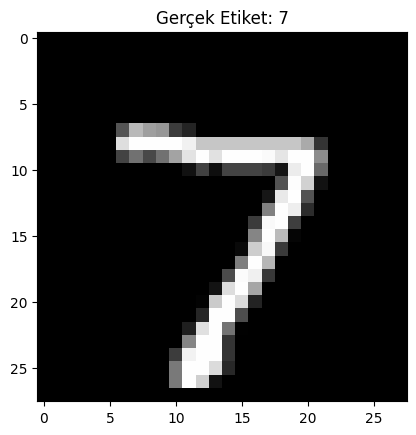

Tahmin Edilen Etiket: 7


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# İlk görüntüyü çizelim
plt.imshow(images[0].numpy().squeeze(), cmap='gray')
plt.title(f"Gerçek Etiket: {labels[0]}")
plt.show()

# Tahmin
output = model(images[0])  # Modeli çalıştırıyoruz
_, pred = torch.max(output.data, 1)  # Sınıf indeksini buluyoruz
print(f"Tahmin Edilen Etiket: {pred.item()}")  # İndeksin tek bir değeri ile yazdırıyoruz

